In [1]:
# read data into pandas DataFrame
# import pandas for data manipulation

# Title: panda-dev/pandas
# Author: The pandas development team
# Date: 2023
# Code Version: latest
# Availability: https://doi.org/10.5281/zenodo.7741580

import pandas as pd

df = pd.read_csv('medical dataset/medical_clean.csv')

In [2]:
# reduce df to relevant features
df = df[['Population',
        'Children',
        'Age',
        'Income',
        'Marital',
        'Gender',
        'ReAdmis',
        'VitD_levels',
        'Doc_visits',
        'Full_meals_eaten',
        'vitD_supp',
        'Soft_drink',
        'Initial_admin',
        'HighBlood',
        'Stroke',
        'Complication_risk',
        'Overweight',
        'Arthritis',
        'Diabetes',
        'Hyperlipidemia',
        'BackPain',
        'Anxiety',
        'Allergic_rhinitis',
        'Reflux_esophagitis',
        'Asthma',
        'Services',
        'Initial_days'
        ]]

In [3]:
# get first 3 rows of data
df.head(3).transpose()

,0,1,2
Population,2951,11303,17125
Children,1,3,3
Age,53,51,53
Income,86575.93,46805.99,14370.14
Marital,Divorced,Married,Widowed
Gender,Male,Female,Female
ReAdmis,No,No,No
VitD_levels,19.141466,18.940352,18.057507
Doc_visits,6,4,4
Full_meals_eaten,0,2,1


In [4]:
# get information on df
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 27 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Population          10000 non-null  int64  
 1   Children            10000 non-null  int64  
 2   Age                 10000 non-null  int64  
 3   Income              10000 non-null  float64
 4   Marital             10000 non-null  object 
 5   Gender              10000 non-null  object 
 6   ReAdmis             10000 non-null  object 
 7   VitD_levels         10000 non-null  float64
 8   Doc_visits          10000 non-null  int64  
 9   Full_meals_eaten    10000 non-null  int64  
 10  vitD_supp           10000 non-null  int64  
 11  Soft_drink          10000 non-null  object 
 12  Initial_admin       10000 non-null  object 
 13  HighBlood           10000 non-null  object 
 14  Stroke              10000 non-null  object 
 15  Complication_risk   10000 non-null  object 
 16  Overw

In [5]:
# get number of unique values for each feature
df.nunique()

Population            5951
Children                11
Age                     72
Income                9993
Marital                  5
Gender                   3
ReAdmis                  2
VitD_levels           9976
Doc_visits               9
Full_meals_eaten         8
vitD_supp                6
Soft_drink               2
Initial_admin            3
HighBlood                2
Stroke                   2
Complication_risk        3
Overweight               2
Arthritis                2
Diabetes                 2
Hyperlipidemia           2
BackPain                 2
Anxiety                  2
Allergic_rhinitis        2
Reflux_esophagitis       2
Asthma                   2
Services                 4
Initial_days          9997
dtype: int64

# Data Cleaning
## Issue Identification
### Duplicates

In [6]:
# check duplication across entire row
df.duplicated().sum()

0

### Missing Values

In [7]:
# check for missing values
df.isnull().sum()

Population            0
Children              0
Age                   0
Income                0
Marital               0
Gender                0
ReAdmis               0
VitD_levels           0
Doc_visits            0
Full_meals_eaten      0
vitD_supp             0
Soft_drink            0
Initial_admin         0
HighBlood             0
Stroke                0
Complication_risk     0
Overweight            0
Arthritis             0
Diabetes              0
Hyperlipidemia        0
BackPain              0
Anxiety               0
Allergic_rhinitis     0
Reflux_esophagitis    0
Asthma                0
Services              0
Initial_days          0
dtype: int64

### Outliers

In [8]:
# create new DataFrame with numeric features
df_num = df.select_dtypes(include='number')
df_num.head()

,Population,Children,Age,Income,VitD_levels,Doc_visits,Full_meals_eaten,vitD_supp,Initial_days
0,2951,1,53,86575.93,19.141466,6,0,0,10.585770
1,11303,3,51,46805.99,18.940352,4,2,1,15.129562
2,17125,3,53,14370.14,18.057507,4,1,0,4.772177
3,2162,0,78,39741.49,16.576858,4,1,0,1.714879
4,5287,1,22,1209.56,17.439069,5,0,2,1.254807


In [9]:
# import scipy to calculate z-scores

# Title: scipy/scipy: Scipy
# Author: Gommers, et al.
# Date: 2023
# Code Version: latest
# Availability: https://doi.org/10.5281/zenodo.7655153

from scipy import stats

# replace values in df_num with z-scores
df_num = stats.zscore(df_num)
df_num.head()

,Population,Children,Age,Income,VitD_levels,Doc_visits,Full_meals_eaten,vitD_supp,Initial_days
0,-0.473168,-0.507129,-0.024795,1.615914,0.583603,0.944647,-0.993387,-0.634713,-0.907310
1,0.090242,0.417277,-0.121706,0.221443,0.483901,-0.967981,0.990609,0.956445,-0.734595
2,0.482983,0.417277,-0.024795,-0.915870,0.046227,-0.967981,-0.001389,-0.634713,-1.128292
3,-0.526393,-0.969332,1.186592,-0.026263,-0.687811,-0.967981,-0.001389,-0.634713,-1.244503
4,-0.315586,-0.507129,-1.526914,-1.377325,-0.260366,-0.011667,-0.993387,2.547602,-1.261991


In [10]:
# return number of outliers found in each column of df_num
df_num[df_num.abs() >= 3].count()

Population          218
Children            202
Age                   0
Income              143
VitD_levels          24
Doc_visits            8
Full_meals_eaten     33
vitD_supp            70
Initial_days          0
dtype: int64

## Issue Handling
### Outliers

In [11]:
# drop records containing outliers
for col in df_num.columns:
    df.drop(df_num.loc[df_num[col].abs() >= 3].index, inplace=True, errors='ignore')
    
df.shape

(9331, 27)

# Data Descriptions

In [12]:
# get summary statistics for numeric features
df.describe()

,Population,Children,Age,Income,VitD_levels,Doc_visits,Full_meals_eaten,vitD_supp,Initial_days
count,9331.000000,9331.000000,9331.000000,9331.000000,9331.000000,9331.000000,9331.000000,9331.000000,9331.000000
mean,8701.586754,1.942343,53.510342,38895.729734,17.961006,5.014146,0.989176,0.377880,34.369673
std,12063.299403,1.898241,20.623584,25378.151394,1.987202,1.039526,0.978105,0.585608,26.328806
min,0.000000,0.000000,18.000000,154.080000,12.038470,2.000000,0.000000,0.000000,1.001981
25%,683.000000,0.000000,36.000000,19414.450000,16.639135,4.000000,0.000000,0.000000,7.849501
50%,2640.000000,1.000000,53.000000,33261.940000,17.944850,5.000000,1.000000,0.000000,30.539196
75%,12463.000000,3.000000,71.000000,53213.445000,19.331745,6.000000,2.000000,1.000000,61.164190
max,54413.000000,8.000000,89.000000,125977.370000,23.941426,8.000000,4.000000,2.000000,71.981490


In [13]:
# get summary statistics for categorical features
df.describe(exclude='number')

,Marital,Gender,ReAdmis,Soft_drink,Initial_admin,HighBlood,Stroke,Complication_risk,Overweight,Arthritis,Diabetes,Hyperlipidemia,BackPain,Anxiety,Allergic_rhinitis,Reflux_esophagitis,Asthma,Services
count,9331,9331,9331,9331,9331,9331,9331,9331,9331,9331,9331,9331,9331,9331,9331,9331,9331,9331
unique,5,3,2,2,3,2,2,3,2,2,2,2,2,2,2,2,2,4
top,Widowed,Female,No,No,Emergency Admission,No,No,Medium,Yes,No,No,No,No,No,No,No,No,Blood Work
freq,1921,4677,5910,6923,4724,5525,7466,4224,6629,5992,6774,6195,5515,6315,5654,5514,6623,4917


# Visualizations
## Univariate Plots

In [14]:
# import matplotlib and seaborn for visualizations

# Title: matplotlib/matplotlib
# Author: Caswell, et al.
# Date: 2023
# Code Version: latest
# Availability: https://doi.org/10.5281/zenodo.7697899

# Title: seaborn: statistical data visualization
# Author: Michael Waskom
# Date: 2021
# Code Version: latest
# Availability: https://doi.org/10.5281/zenodo.4645478

import matplotlib.pyplot as plt
import seaborn as sns

In [15]:
# create new DataFrames numerical and categorical data
numerical = df.select_dtypes(include='number')
categorical = df.select_dtypes(exclude='number')

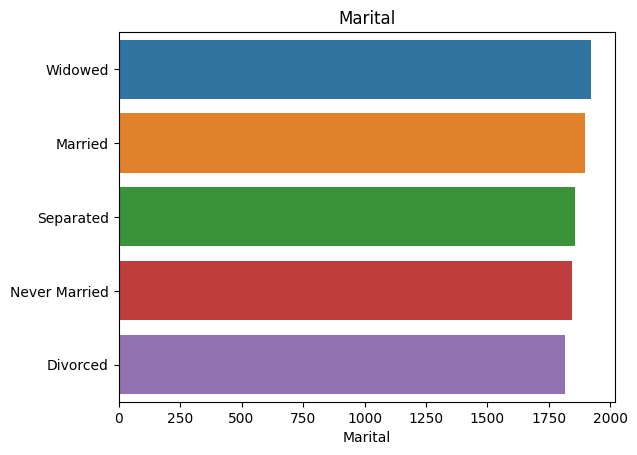

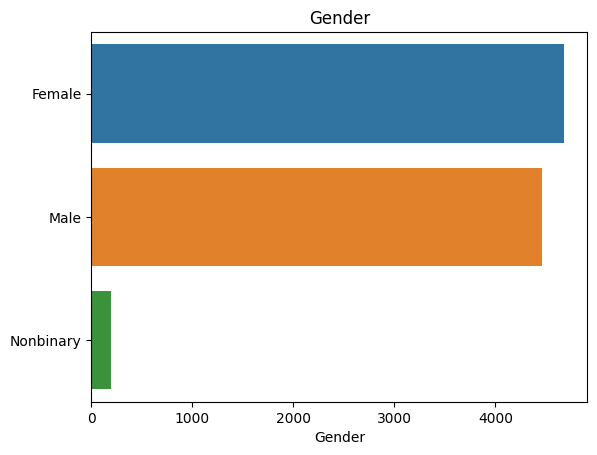

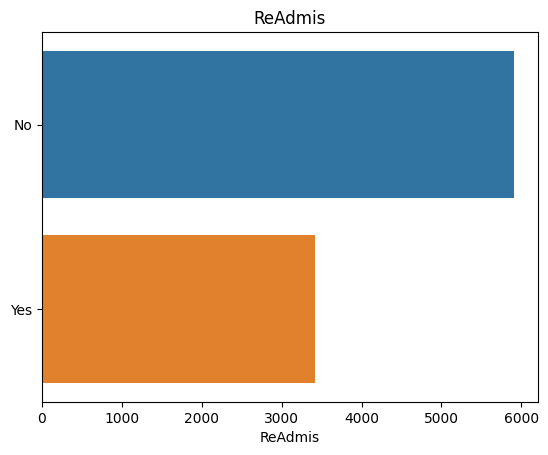

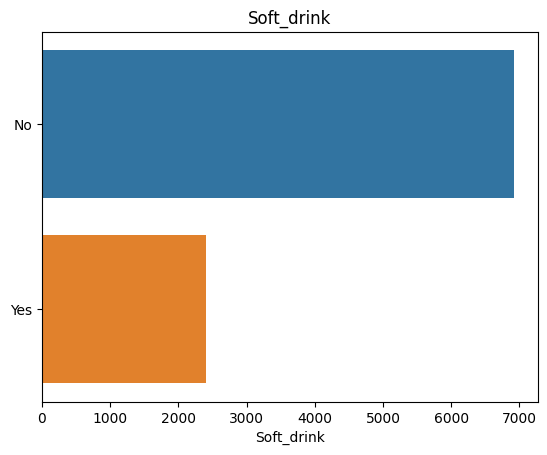

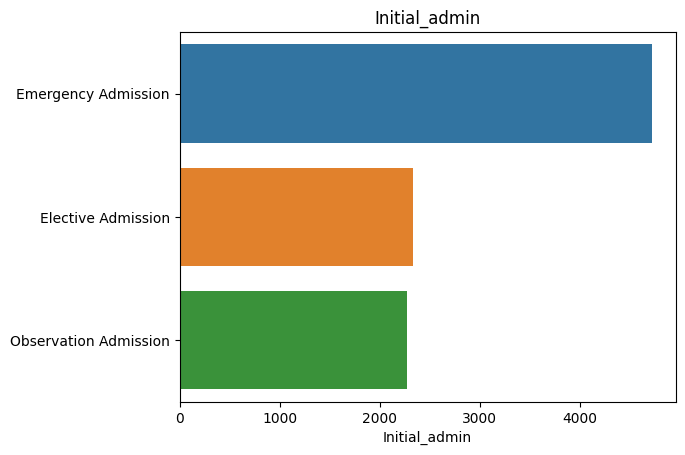

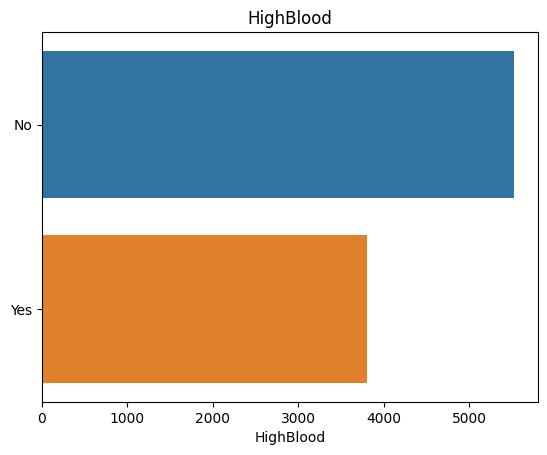

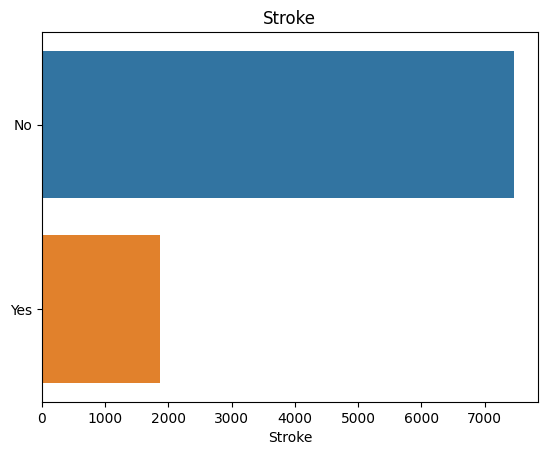

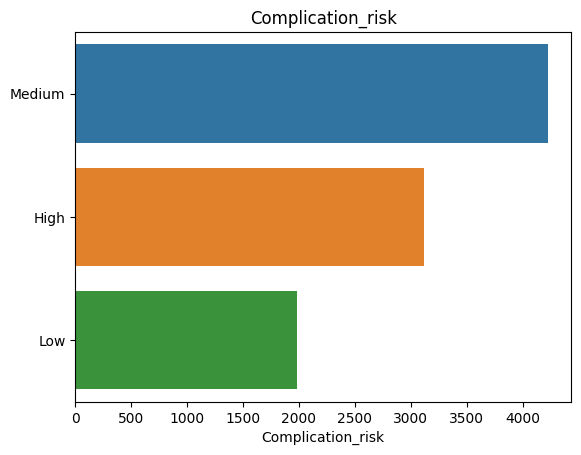

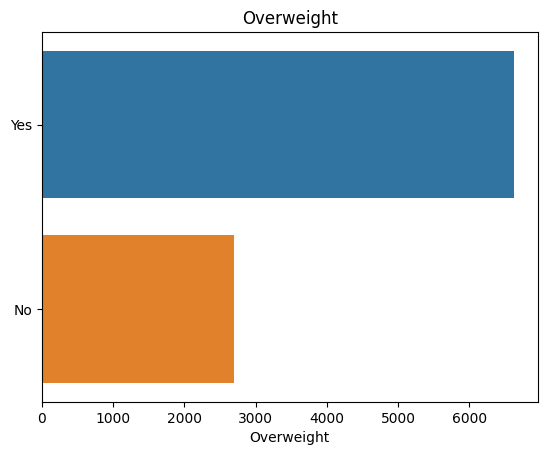

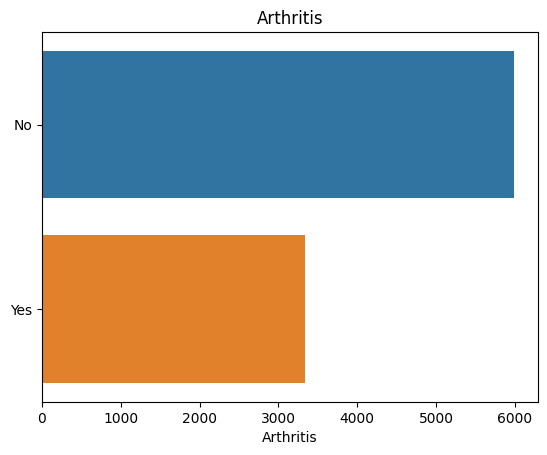

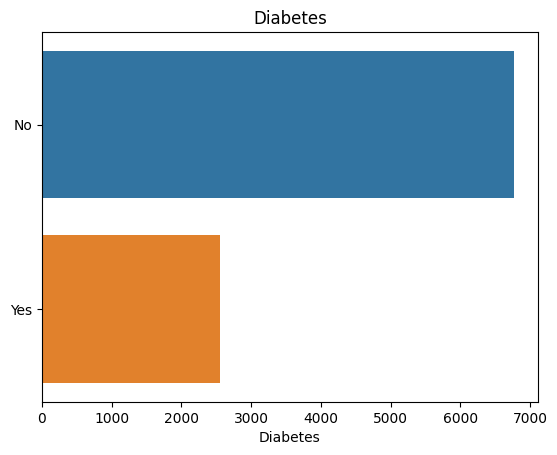

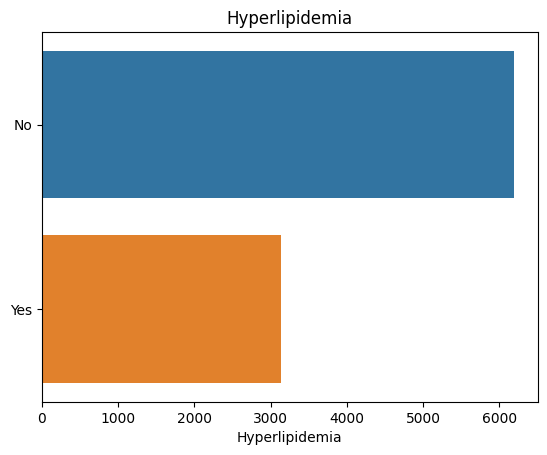

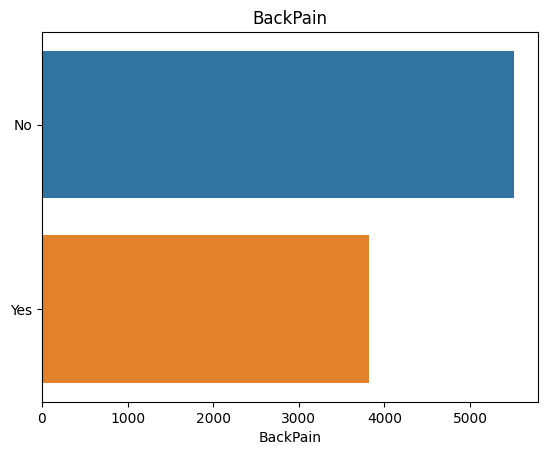

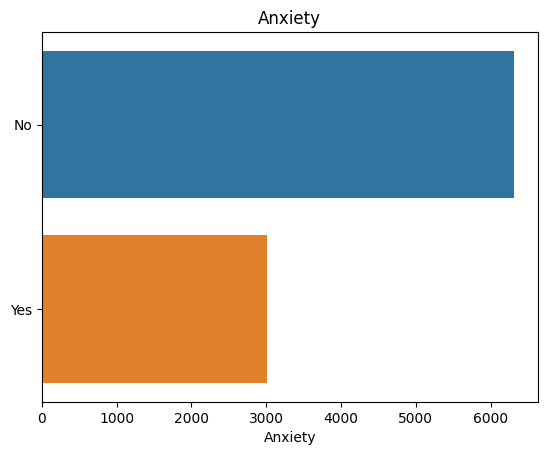

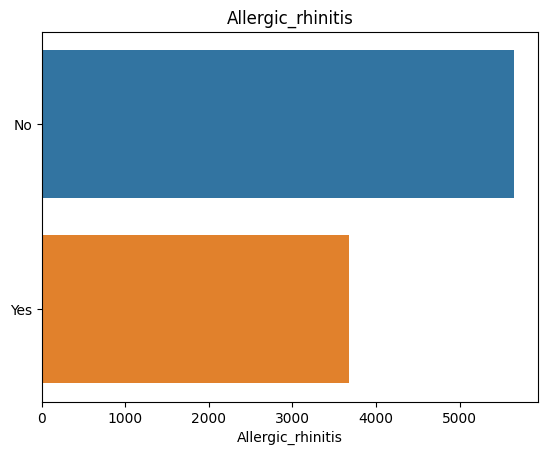

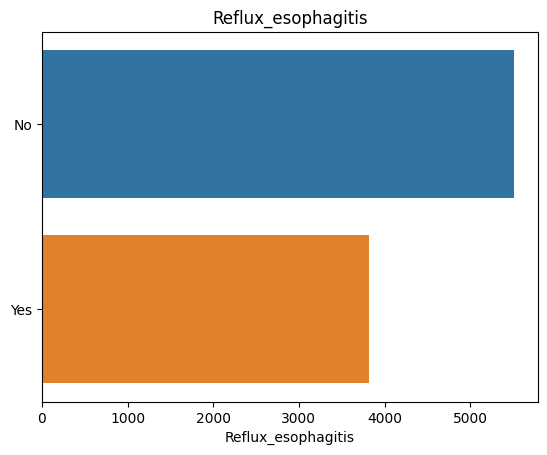

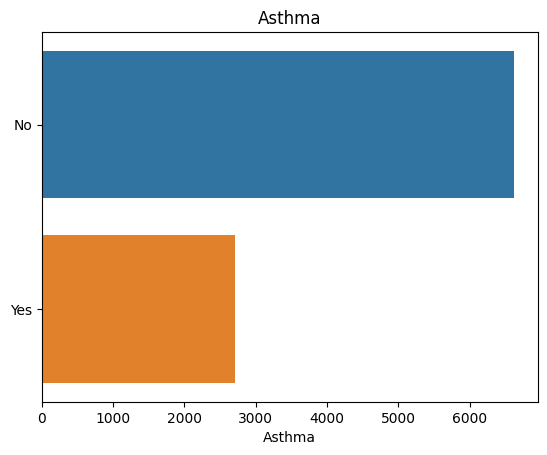

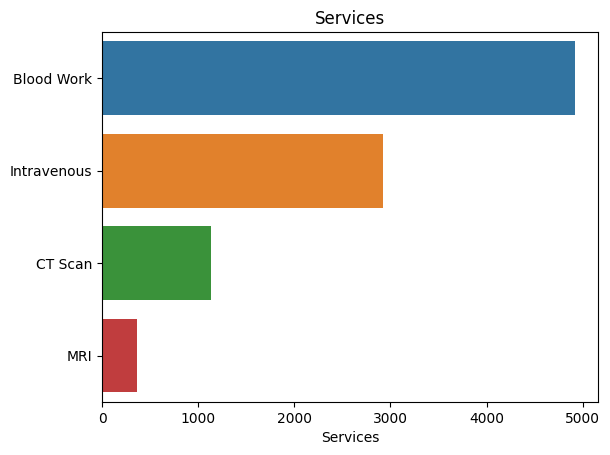

In [16]:
# create all barcharts
for col in categorical.columns:
    plt.figure()
    sns.barplot(data=categorical, x=categorical[col].value_counts(), y=categorical[col].value_counts().index)
    plt.title(col)
    plt.show()

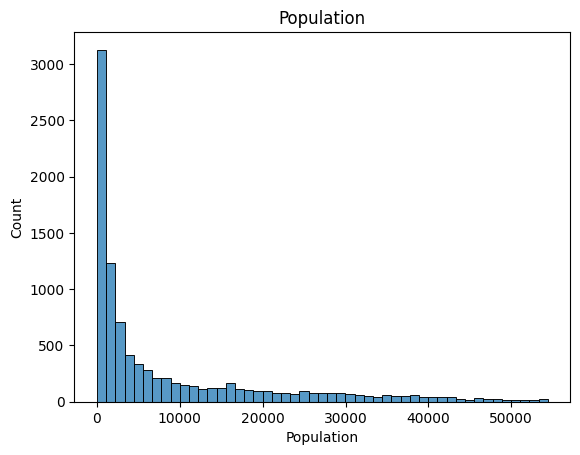

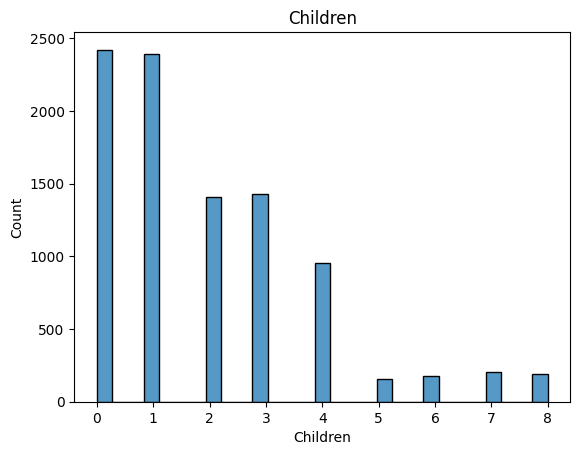

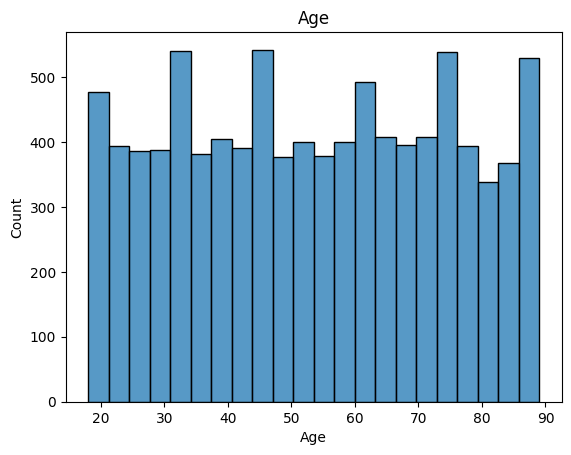

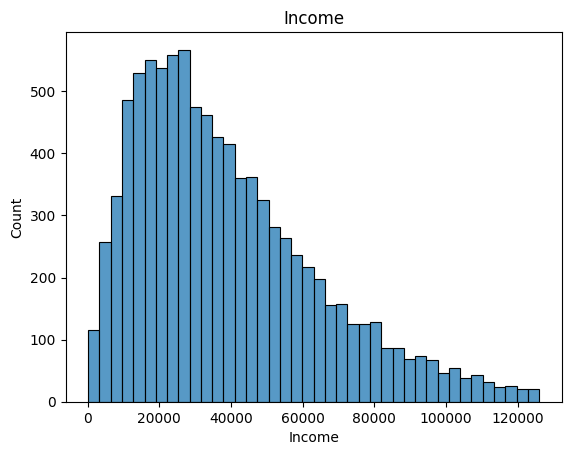

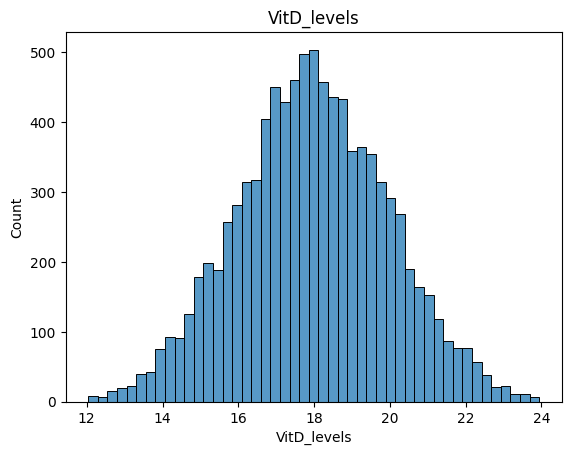

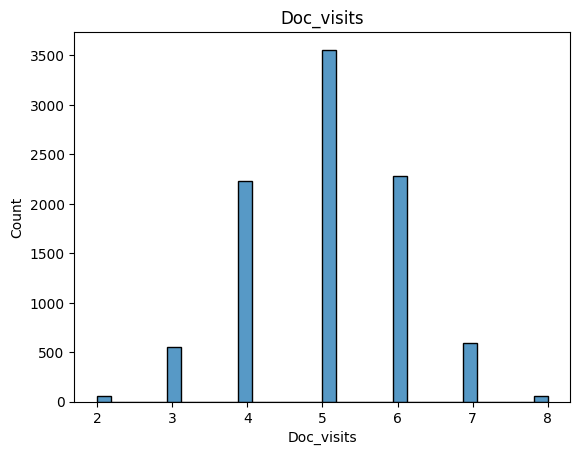

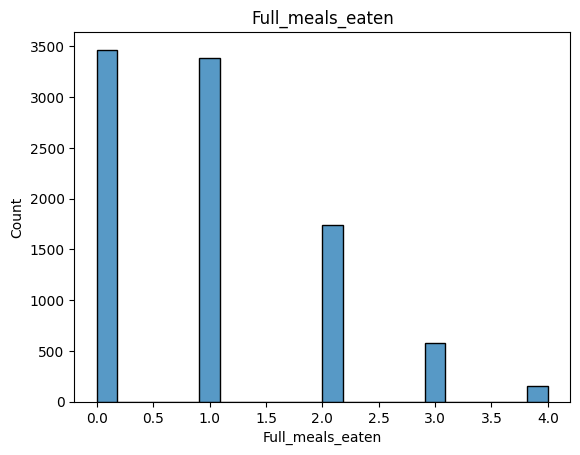

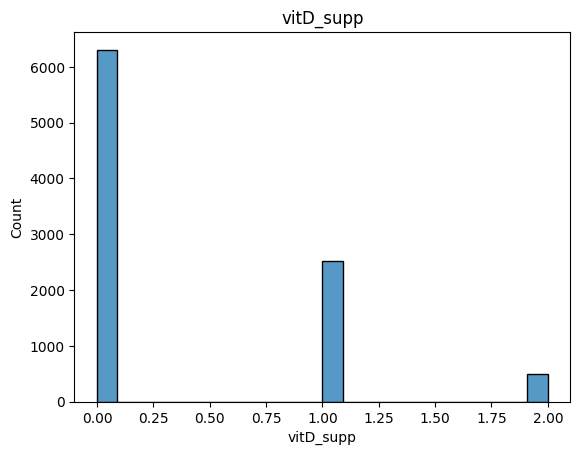

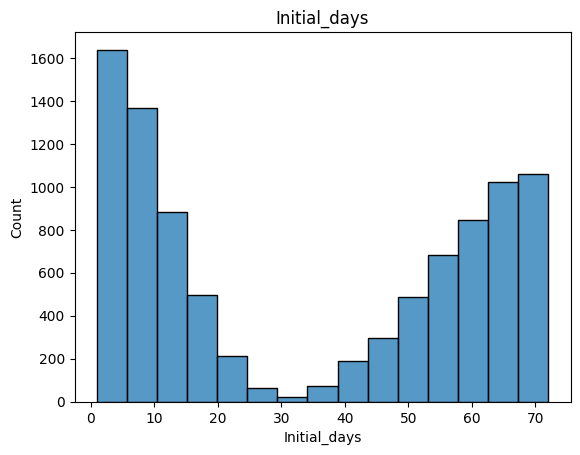

In [17]:
# create all histograms
for col in numerical.columns:
    plt.figure()
    sns.histplot(data=numerical[col])
    plt.title(col)
    plt.show()

## Bivariate Plots

<Figure size 640x480 with 0 Axes>

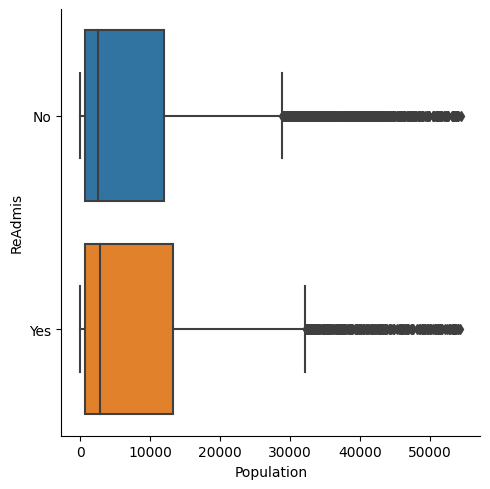

<Figure size 640x480 with 0 Axes>

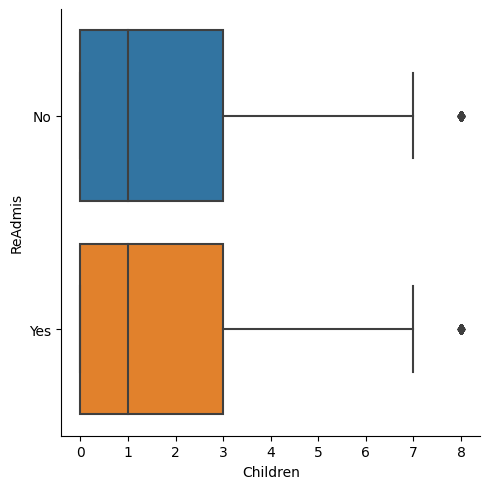

<Figure size 640x480 with 0 Axes>

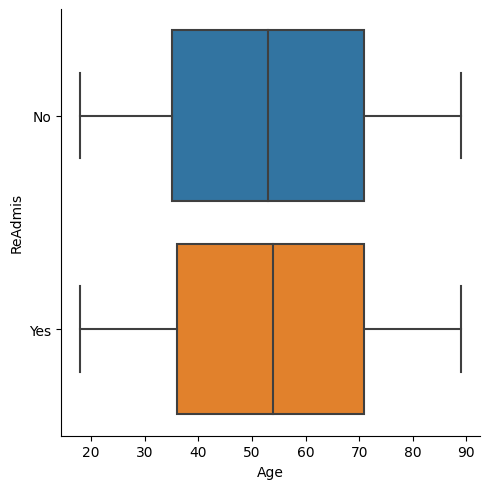

<Figure size 640x480 with 0 Axes>

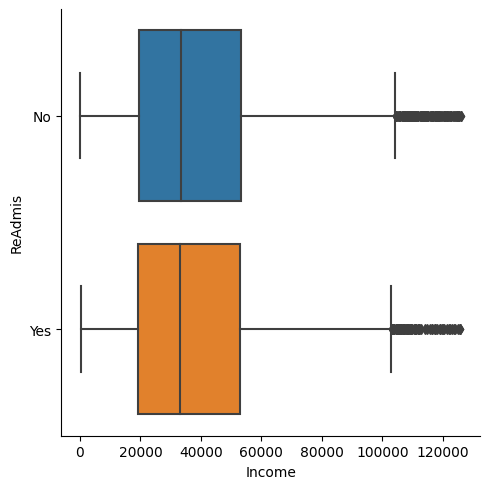

<Figure size 640x480 with 0 Axes>

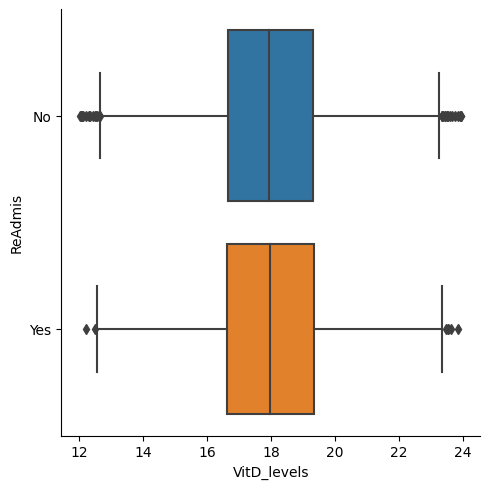

<Figure size 640x480 with 0 Axes>

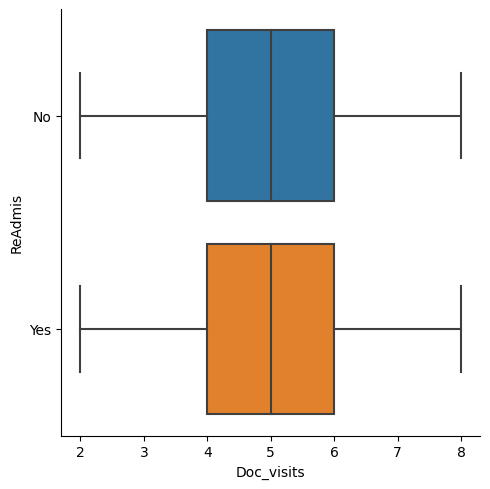

<Figure size 640x480 with 0 Axes>

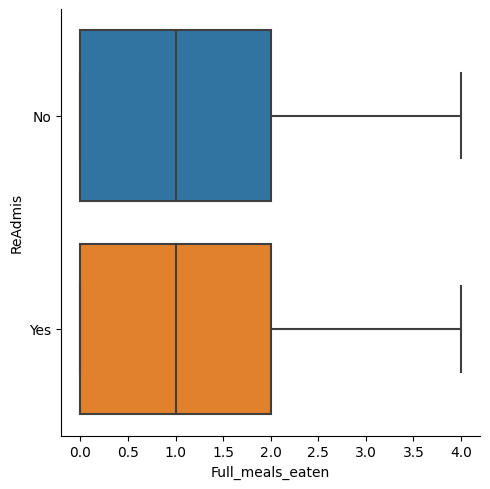

<Figure size 640x480 with 0 Axes>

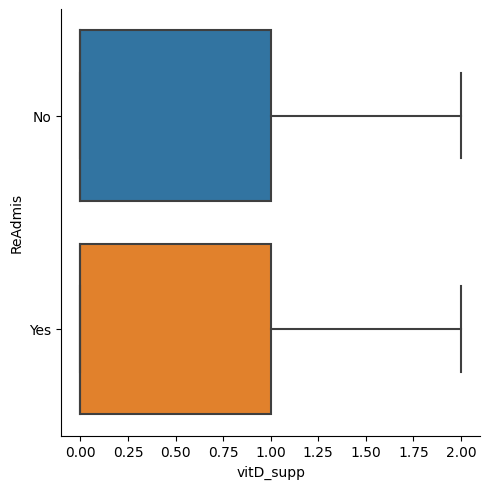

<Figure size 640x480 with 0 Axes>

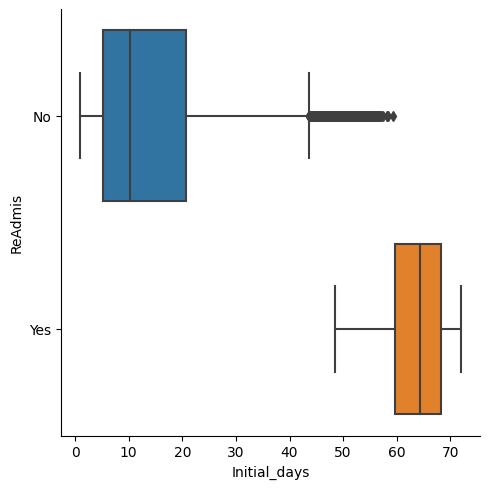

In [18]:
# create all catplots
for col in numerical.columns:
    plt.figure()
    sns.catplot(data=df, x=col, y='ReAdmis', kind='box')
    plt.show()

In [21]:
# drop ReAdmis from categorical DataFrame
categorical.drop(columns='ReAdmis', inplace=True)

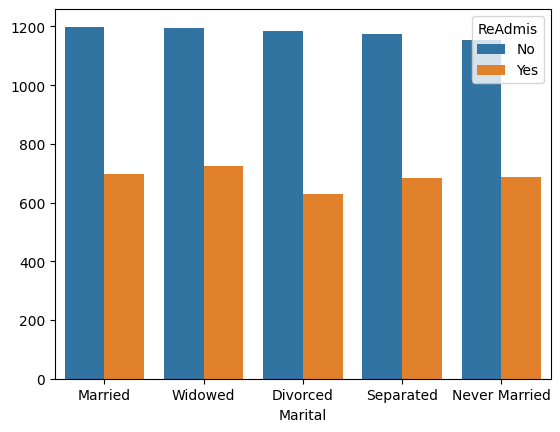

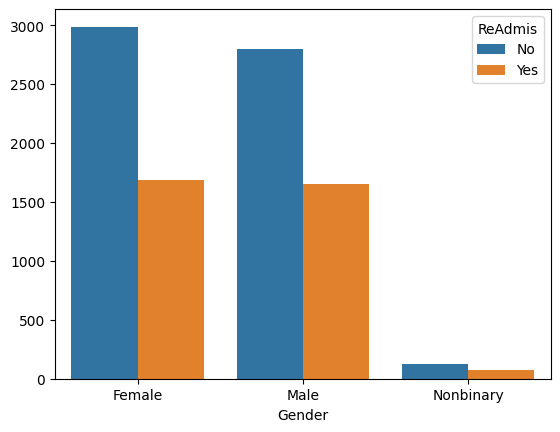

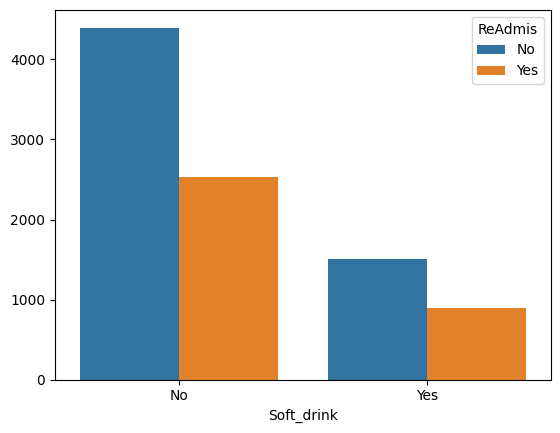

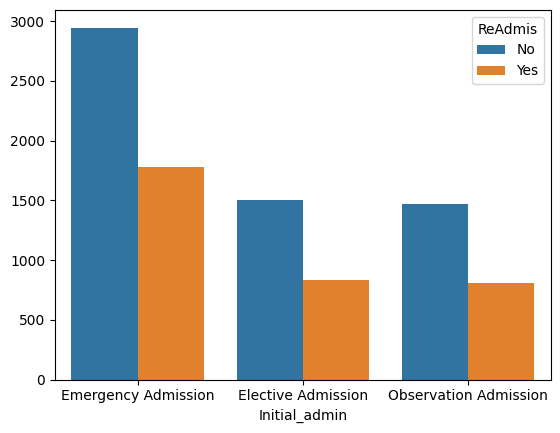

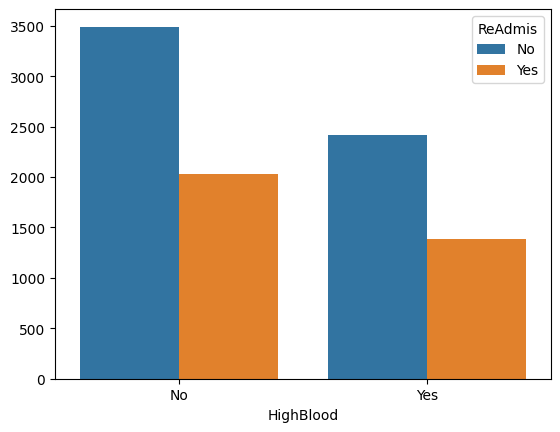

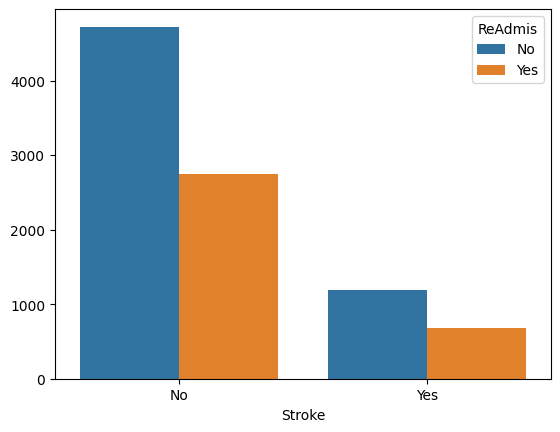

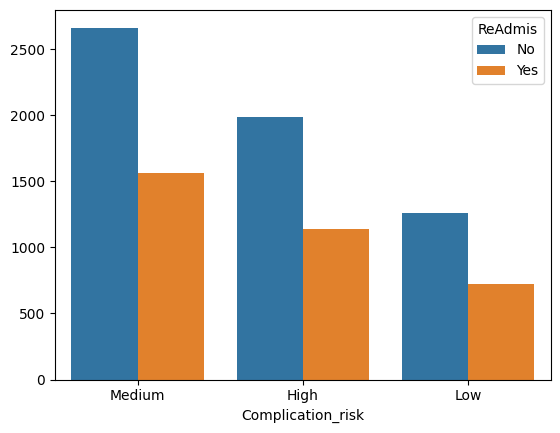

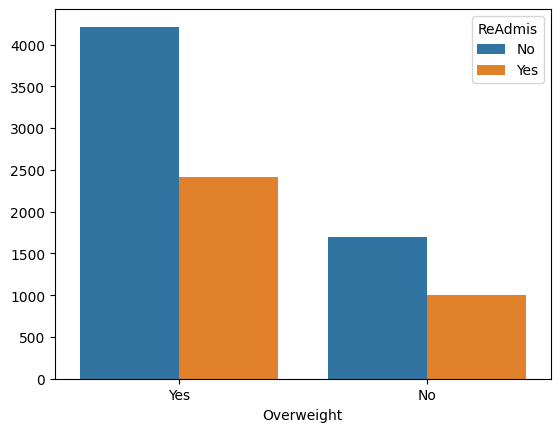

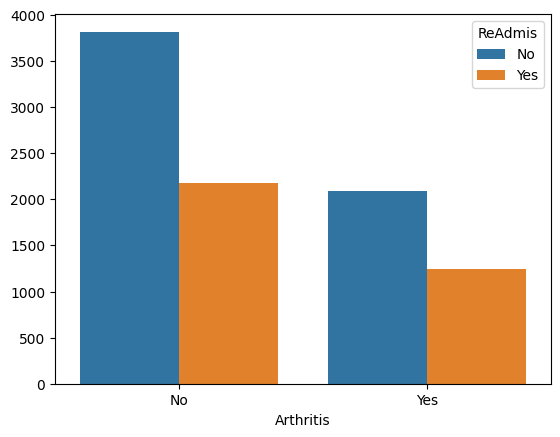

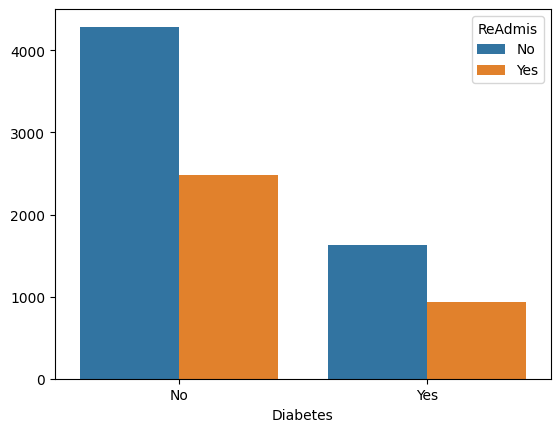

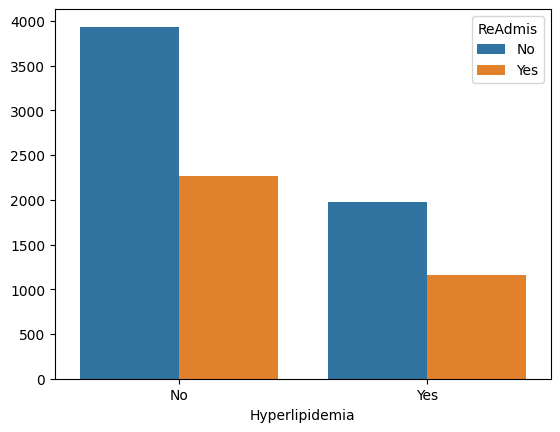

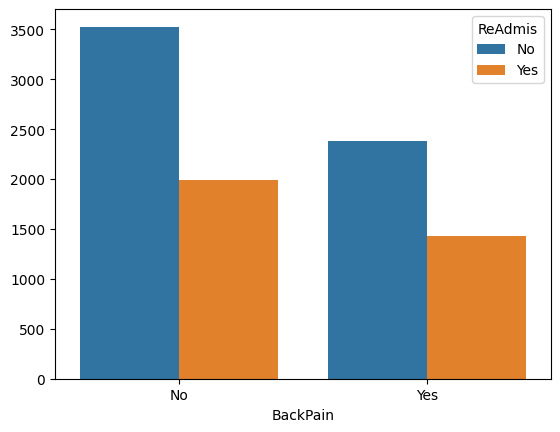

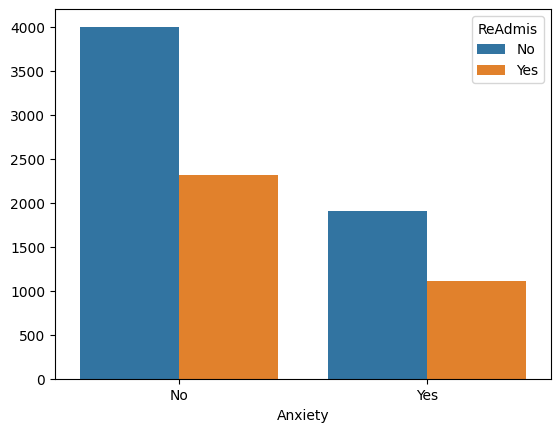

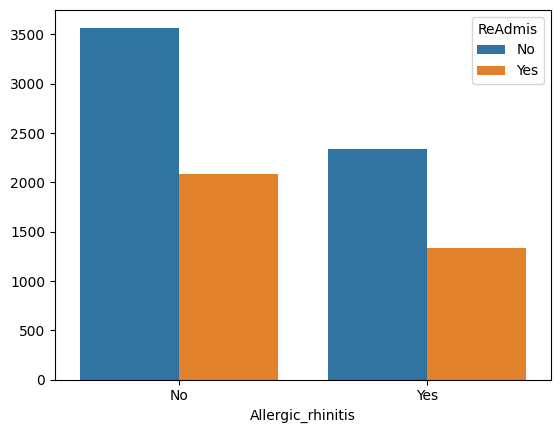

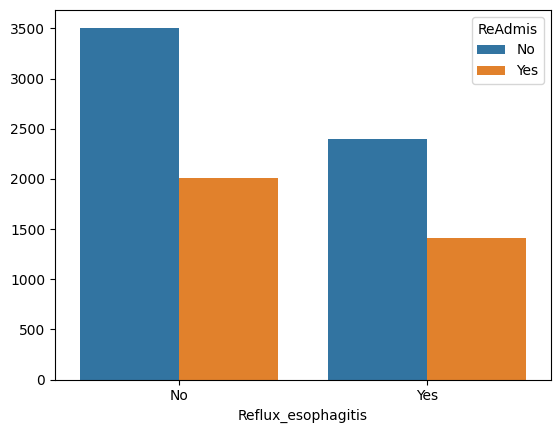

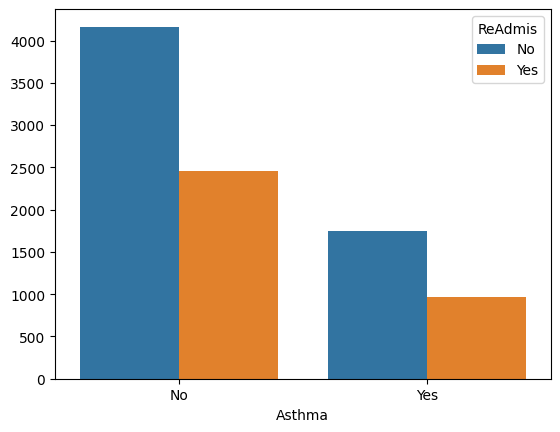

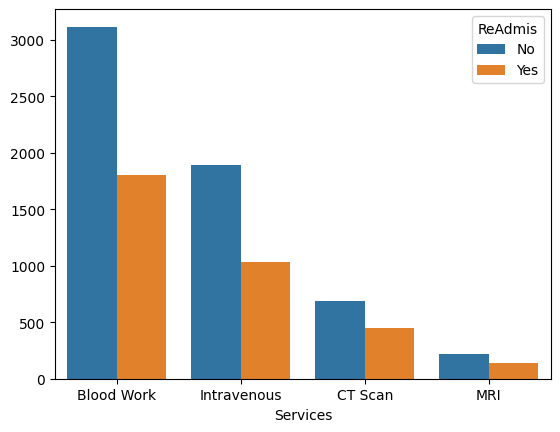

In [22]:
# create all multi barcharts
for col in categorical.columns:
    data = df[[col, 'ReAdmis']].value_counts()
    plt.figure()
    sns.barplot(x=data.index.get_level_values(0), y=data.values, hue=data.index.get_level_values(1))
    plt.show()

# Data Transformation

In [23]:
categorical.nunique()

Marital               5
Gender                3
Soft_drink            2
Initial_admin         3
HighBlood             2
Stroke                2
Complication_risk     3
Overweight            2
Arthritis             2
Diabetes              2
Hyperlipidemia        2
BackPain              2
Anxiety               2
Allergic_rhinitis     2
Reflux_esophagitis    2
Asthma                2
Services              4
dtype: int64

In [24]:
# encode ordinal data
# start with binary values
df.replace(to_replace='No', value=0, inplace=True)
df.replace(to_replace='Yes', value=1, inplace=True)

In [25]:
# encode remaining ordinal data
# import scikit-learn to perform label encoding

# Title: scikit-learn/scikit-learn
# Author: Grisel, et al.
# Date: 2022
# Code Version: latest
# Availability: https://doi.org/10.5281/zenodo.6543413

from sklearn.preprocessing import OrdinalEncoder

oe = OrdinalEncoder(categories=[['Low', 'Medium', 'High']])
df['Complication_risk'] = oe.fit_transform(df[['Complication_risk']])

In [26]:
# perform dummy variable encoding nominal data
df = pd.get_dummies(df, columns=['Marital', 'Gender', 'Initial_admin', 'Services'], drop_first=True)
df.head(5).transpose()

,0,1,2,3,4
Population,2951.000000,11303.000000,17125.000000,2162.000000,5287.000000
Children,1.000000,3.000000,3.000000,0.000000,1.000000
Age,53.000000,51.000000,53.000000,78.000000,22.000000
Income,86575.930000,46805.990000,14370.140000,39741.490000,1209.560000
ReAdmis,0.000000,0.000000,0.000000,0.000000,0.000000
VitD_levels,19.141466,18.940352,18.057507,16.576858,17.439069
Doc_visits,6.000000,4.000000,4.000000,4.000000,5.000000
Full_meals_eaten,0.000000,2.000000,1.000000,1.000000,0.000000
vitD_supp,0.000000,1.000000,0.000000,0.000000,2.000000
Soft_drink,0.000000,0.000000,0.000000,0.000000,1.000000


In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9331 entries, 0 to 9999
Data columns (total 34 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Population                           9331 non-null   int64  
 1   Children                             9331 non-null   int64  
 2   Age                                  9331 non-null   int64  
 3   Income                               9331 non-null   float64
 4   ReAdmis                              9331 non-null   int64  
 5   VitD_levels                          9331 non-null   float64
 6   Doc_visits                           9331 non-null   int64  
 7   Full_meals_eaten                     9331 non-null   int64  
 8   vitD_supp                            9331 non-null   int64  
 9   Soft_drink                           9331 non-null   int64  
 10  HighBlood                            9331 non-null   int64  
 11  Stroke                        

In [28]:
# save prepared data to csv
df.to_csv('medical_prepared_data2.csv', header=True)